# Flightlines

In [12]:
import cPickle as pickle
from fatiando import gridder
import numpy as np
import matplotlib.pyplot as plt

In [13]:
shape = (10, 100)
area = [-5000., 5000., -5000., 5000.]
h = -1150.
x, y, z = gridder.regular(area, shape, z=h)
shape2 = (100, 3)
x2, y2, z2 = gridder.regular(area, shape2, z=h)

In [14]:
x = np.hstack((x,x2))
y = np.hstack((y,y2))
z = np.hstack((z,z2))

In [15]:
x += np.random.uniform(-20., 20., 1300)
y += np.random.uniform(-20., 20., 1300)

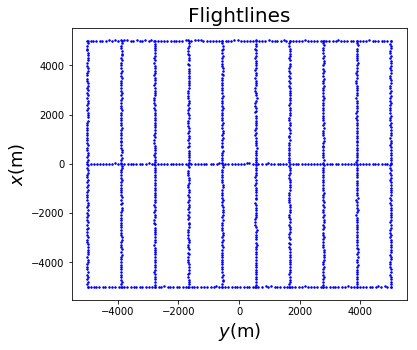

In [16]:
plt.figure(figsize=(6,5))
plt.title('Flightlines', fontsize=20)
#plt.tricontourf(regular_grid['yp'], regular_grid['xp'],
#                d0, 40, cmap='jet').ax.tick_params(labelsize=12)
plt.plot(x, y, 'bo', markersize=1.5)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)

plt.show()

In [17]:
flightlines_grid = dict()
flightlines_grid['N'] = x.size
flightlines_grid['area'] = area
flightlines_grid['x'] = x
flightlines_grid['y'] = y
flightlines_grid['z'] = z

In [18]:
a = (abs(area[0]) + abs(area[1]))*(abs(area[2]) + abs(area[3]))/1000000.
file_name = 'flightlines_grid_%dpts_%dkm2_%dm.pickle' % (x.size, a, h)
with open(file_name, 'w') as f:
    pickle.dump(flightlines_grid, f)